In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accX       31991 non-null  float64
 1   accY       31991 non-null  float64
 2   accZ       31991 non-null  float64
 3   gyroX      31991 non-null  float64
 4   gyroY      31991 non-null  float64
 5   gyroZ      31991 non-null  float64
 6   timestamp  31991 non-null  object 
 7   Activity   31991 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


In [2]:
# Add Random Forest Classifier.

In [3]:
df.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1


In [4]:
print(type(df['timestamp']))

<class 'pandas.core.series.Series'>


In [5]:
df = df.drop(columns=['timestamp'])
df.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,1


In [6]:
df.isna().sum()

accX        0
accY        0
accZ        0
gyroX       0
gyroY       0
gyroZ       0
Activity    0
dtype: int64

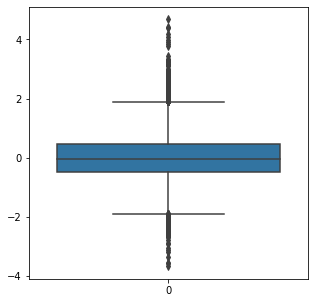

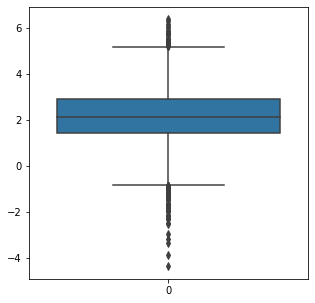

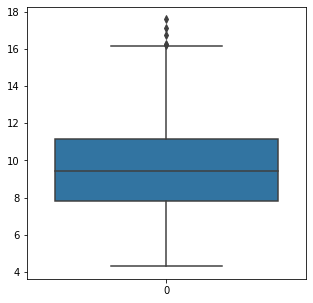

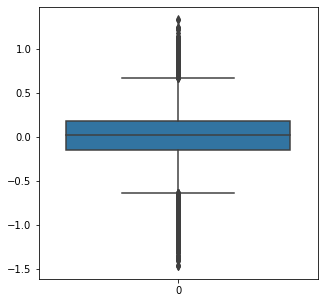

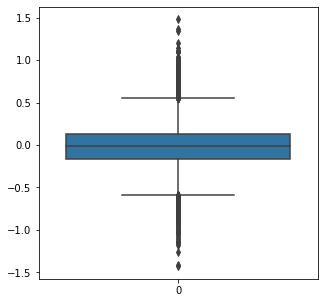

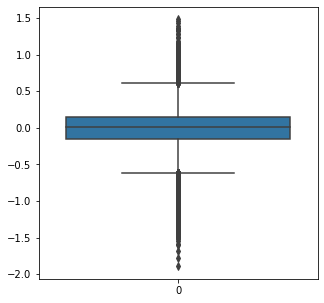

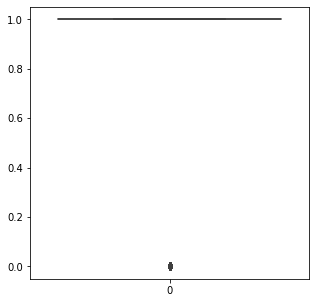

In [7]:
# Data exploration.
import seaborn as sns 
import matplotlib.pyplot as plt
for i in df.columns:
    plt.subplots(figsize=(5, 5))
    sns.boxplot(df[i])

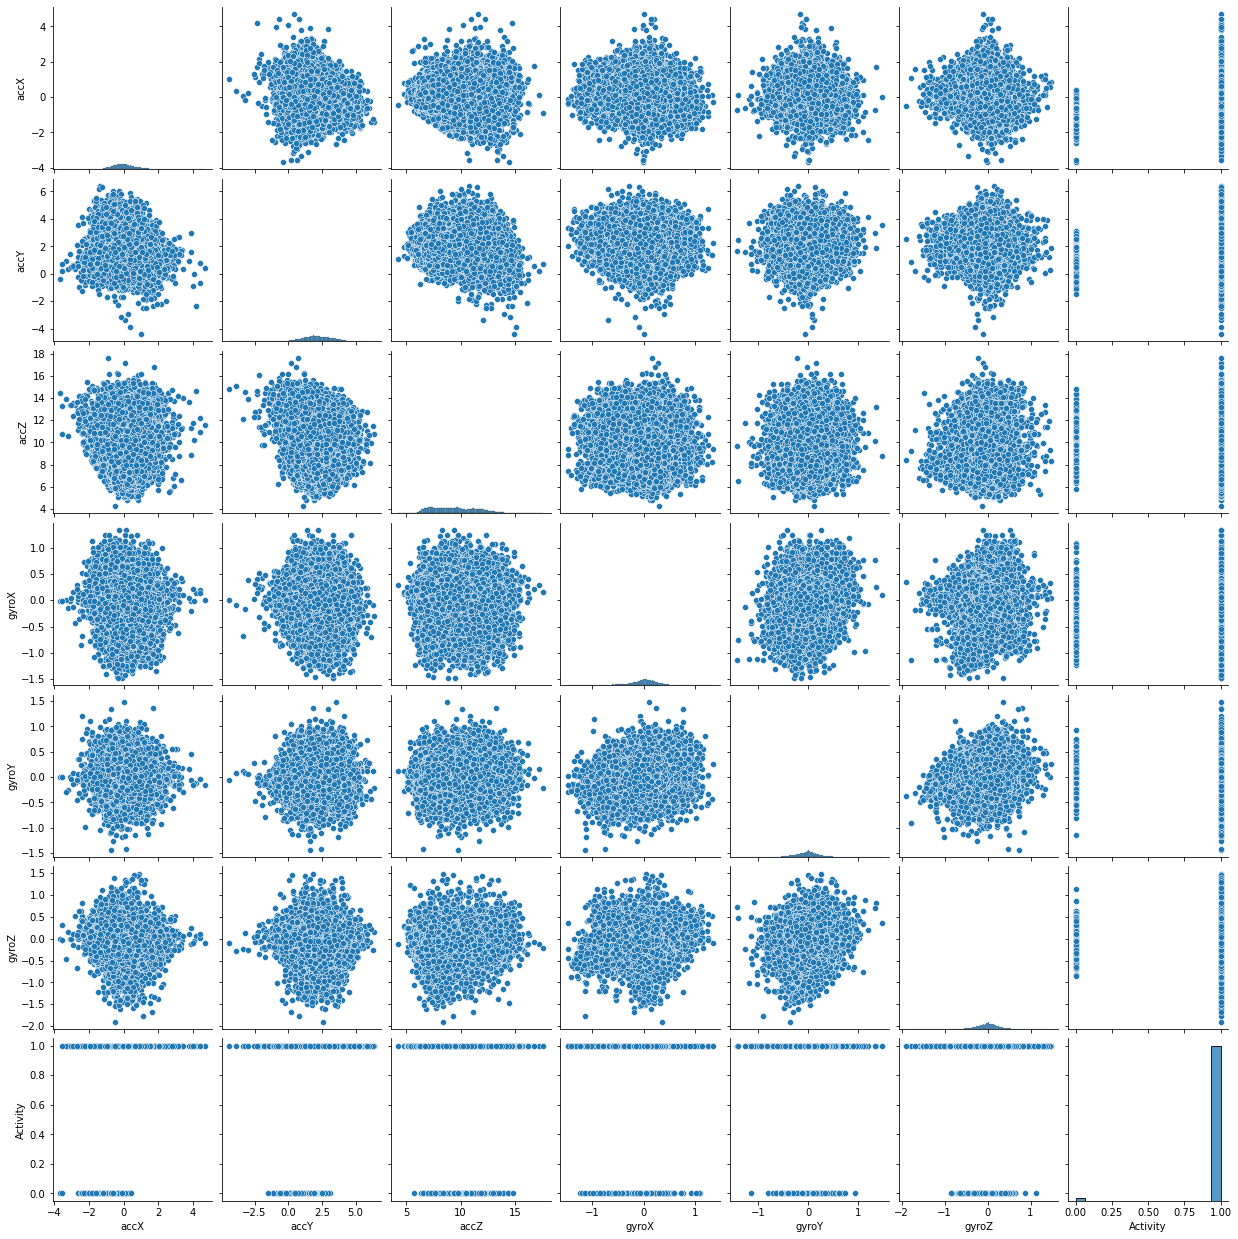

In [8]:
sns.pairplot(df)

In [9]:
print(np.corrcoef(df.values.T)) # value of correlation matrix -> between -1 & +1

[[ 1.         -0.19432489  0.01849604 -0.031462   -0.02796158 -0.04764773
   0.12677141]
 [-0.19432489  1.         -0.07952663 -0.00435775 -0.008545   -0.00464391
   0.11348574]
 [ 0.01849604 -0.07952663  1.         -0.03397322 -0.02295859  0.01492316
  -0.01444792]
 [-0.031462   -0.00435775 -0.03397322  1.          0.12969205  0.1468777
   0.00146939]
 [-0.02796158 -0.008545   -0.02295859  0.12969205  1.          0.05162067
  -0.00160628]
 [-0.04764773 -0.00464391  0.01492316  0.1468777   0.05162067  1.
  -0.00945961]
 [ 0.12677141  0.11348574 -0.01444792  0.00146939 -0.00160628 -0.00945961
   1.        ]]


<AxesSubplot:>

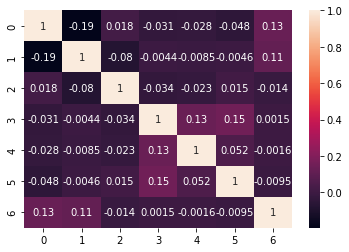

In [10]:
sns.heatmap(np.corrcoef(df.values.T), annot=True) # Correlation should be less.

In [11]:
target = df['Activity']
df = df.drop(columns='Activity')
from sklearn.preprocessing import MinMaxScaler # Every value between -> 0 & 1
minMaxScaler = MinMaxScaler()
df_scaled = pd.DataFrame(minMaxScaler.fit_transform(df))
print(df_scaled)

              0         1         2         3         4         5
0      0.380368  0.759231  0.350401  0.473601  0.448160  0.554312
1      0.384454  0.767033  0.375001  0.554652  0.524721  0.588274
2      0.404366  0.762472  0.348589  0.546595  0.509209  0.582101
3      0.383576  0.768939  0.334549  0.527287  0.501354  0.593399
4      0.383253  0.789286  0.349377  0.480454  0.525532  0.576372
...         ...       ...       ...       ...       ...       ...
31986  0.381300  0.557167  0.474922  0.552811  0.431649  0.546071
31987  0.433902  0.664785  0.203995  0.494648  0.494131  0.547465
31988  0.474693  0.686425  0.183245  0.526696  0.471234  0.535207
31989  0.470500  0.785572  0.330327  0.546497  0.485909  0.534709
31990  0.517206  0.897487  0.445311  0.473799  0.491198  0.575491

[31991 rows x 6 columns]


In [12]:
target.unique()

array([1, 0], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df, target, test_size=0.3)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(22393, 6) (9598, 6) (22393,) (9598,)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
decisionTree = DecisionTreeClassifier()
decisionTree.fit(xTrain, yTrain)
trainingPredictionDT = decisionTree.predict(xTrain)
testingPredictionDT = decisionTree.predict(xTest)
print("Training Accuracy: ", accuracy_score(trainingPredictionDT, yTrain))
print("Testing Accuracy: ", accuracy_score(testingPredictionDT, yTest))

Training Accuracy:  1.0
Testing Accuracy:  0.9745780370910606


In [15]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(xTrain, yTrain)
trainingPredictionP = perceptron.predict(xTrain)
testingPredictionP = perceptron.predict(xTest)
print("Training accuracy : ", accuracy_score(trainingPredictionP, yTrain))
print("Testing accuracy : ", accuracy_score(testingPredictionP, yTest))

Training accuracy :  0.9826284999776715
Testing accuracy :  0.9810377161908731


In [16]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter=300)
logisticRegression.fit(xTrain, yTrain)
trainingPredictionLR = logisticRegression.predict(xTrain)
testingPredictionLR = logisticRegression.predict(xTest)
print("Training accuracy : ", accuracy_score(trainingPredictionLR, yTrain))
print("Testing accuracy : ", accuracy_score(testingPredictionLR, yTest))

Training accuracy :  0.982226588666101
Testing accuracy :  0.9806209627005626


In [17]:
from sklearn.neighbors import KNeighborsClassifier
for i in range (1, 10): # HyperParameter Training
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain, yTrain)
    trainingPredictionKNN = knn.predict(xTrain)
    testingPredictionLKNN = knn.predict(xTest)
    print("Neighbors: ",i)
    print("Training accuracy : ", accuracy_score(trainingPredictionKNN, yTrain))
    print("Testing accuracy : ", accuracy_score(testingPredictionLKNN, yTest))

Neighbors:  1
Training accuracy :  1.0
Testing accuracy :  0.9737445301104397
Neighbors:  2
Training accuracy :  0.9876300629661054
Testing accuracy :  0.9637424463429881
Neighbors:  3
Training accuracy :  0.9873174652793284
Testing accuracy :  0.9802042092102521
Neighbors:  4
Training accuracy :  0.9845933997231278
Testing accuracy :  0.9785371952490102
Neighbors:  5
Training accuracy :  0.9853972223462689
Testing accuracy :  0.9814544696811836
Neighbors:  6
Training accuracy :  0.9850846246594918
Testing accuracy :  0.9815586580537612
Neighbors:  7
Training accuracy :  0.984727370160318
Testing accuracy :  0.9820795999166493
Neighbors:  8
Training accuracy :  0.9847720269727147
Testing accuracy :  0.9817670347989165
Neighbors:  9
Training accuracy :  0.9848613405975082
Testing accuracy :  0.9821837882892269


In [18]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [22]:
pipe = Pipeline([('pca', PCA()), ('svm', SVC(kernel="rbf"))])
pipe.fit(xTrain, yTrain)

Pipeline(steps=[('pca', PCA()), ('svm', SVC())])

In [23]:
print("Training data score : ", pipe.score(xTrain, yTrain))
print("Testing data score : ", pipe.score(xTest, yTest))

Training data score :  0.9826284999776715
Testing data score :  0.9810377161908731


In [24]:
# GRID SEARCH CV -> Hyperparameter Tuning.(Used For)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params={'random_state': [0, 1, 2], 'max_leaf_nodes': [10, 20, 40], 'max_depth': [100, 200, 50]}
gs = GridSearchCV(RandomForestClassifier(), params)
gs.fit(xTrain, yTrain)
print("Best Parameters: ", gs.best_params_) # Tells us which parameter values are best for the currently coosen model.

Best Parameters:  {'max_depth': 100, 'max_leaf_nodes': 40, 'random_state': 1}


In [25]:
randomForestClassifier = RandomForestClassifier(random_state=1, max_leaf_nodes=40, max_depth=100)
randomForestClassifier.fit(xTrain, yTrain)

RandomForestClassifier(max_depth=100, max_leaf_nodes=40, random_state=1)

In [26]:
randomForestClassifierPred = randomForestClassifier.predict(xTest)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, randomForestClassifierPred)
print(cm)

[[   0  169]
 [  16 9413]]


In [27]:
print

0.9820795999166493

In [28]:
print("Training data score : ", randomForestClassifier.score(xTrain, yTrain))
print("Testing data score : ", randomForestClassifier.score(xTest, yTest))

Training data score :  0.9846827133479212
Testing data score :  0.9820795999166493
